# X-ray Holography 

X-ray Holography images the out of plane component of the magnetisation

### Importing Packages

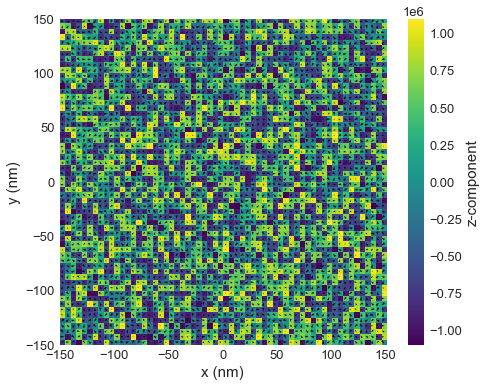

In [1]:
#%matplotlib inline
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import ubermagutil.units as uu
np.random.seed(1)

region = df.Region(p1=(-150e-9, -150e-9, 0), p2=(150e-9, 150e-9, 20e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='Box2')

system.energy = (mm.Exchange(A=1.6e-11)
                 + mm.DMI(D=4e-3, crystalclass='T') 
                 + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1)) 
                 + mm.Demag()
                 + mm.Zeeman(H=(0, 0, 2e5)))

Ms = 1.1e6

def m_fun(pos):
    return 2 * np.random.rand(3) - 1

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_fun, norm=Ms)
system.m.plane('z').mpl()

Running OOMMF (ExeOOMMFRunner) [2021/07/09 17:37]... (27.0 s)


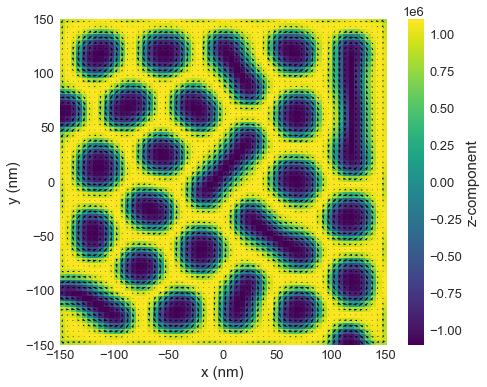

In [2]:
# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [3]:
def xray_holography(system, fwhm=None):
    return system.m.z.integral(direction='z')

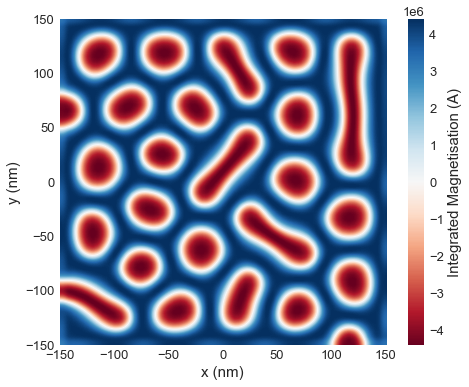

In [4]:
holo = xray_holography(system)
holo.mpl_scalar(cmap='RdBu',
                interpolation='spline16',
                colorbar_label=r'Integrated Magnetisation (A)')

Add possibility for resolution

In [5]:
import mag2exp

In [9]:
holo2 = mag2exp.x_ray.holography(system.m, fwhm=23e-9)

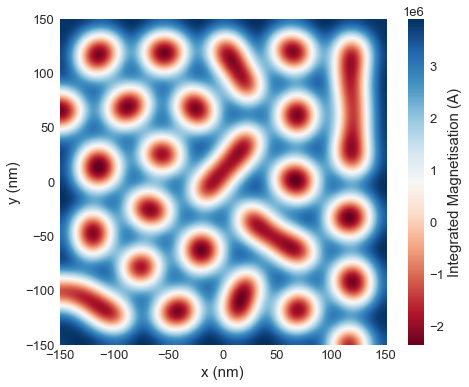

In [10]:
holo2.mpl_scalar(cmap='RdBu',
                interpolation='spline16',
                colorbar_label=r'Integrated Magnetisation (A)')

In [6]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import ubermagutil.units as uu
import mag2exp
Ms = 1.1e6

In [7]:
region = df.Region(p1=(-50e-9, -100e-9, 0), p2=(50e-9, 100e-9, 30e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 0.3e-9))

def m_fun(pos):
    x, y, z = pos
    qx = 30e-9
    qz = 20e-9
    return [0, 0, Ms*np.cos(2*np.pi*x/qx)*np.sin(2*np.pi*z/qz)]
m = df.Field(mesh, dim=3, value=m_fun)

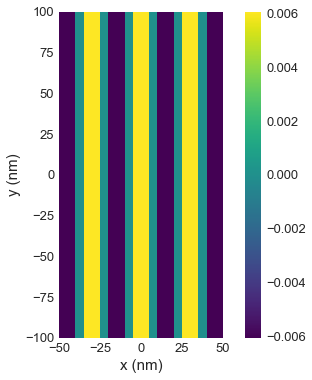

In [8]:
holo = mag2exp.x_ray.holography(m)
holo.mpl.plot()

In [9]:
def a_fun(pos):
    x, y, z = pos
    qx = 30e-9
    qz = 20e-9
    return - qz/(2*np.pi) * Ms * np.cos(2*np.pi*x/qx)*(np.cos(2*np.pi*30e-9/qz)-1)

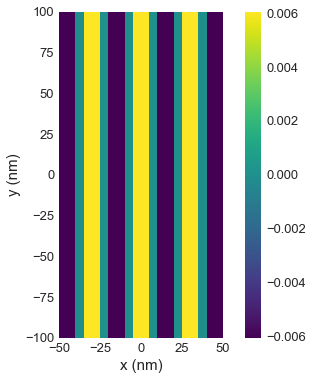

In [10]:
ana = df.Field(holo.mesh, dim=1, value=a_fun).plane('z')
ana.mpl.scalar()

In [11]:
np.isclose(holo.array, ana.array,rtol=1e-3).all()

True

In [50]:
region = df.Region(p1=(-50e-9, -100e-9, 0), p2=(50e-9, 100e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 0.05e-9))
Ms = 1
def m_fun(pos):
    x, y, z = pos
    qx = 30e-9
    qz = 20e-9
    return [0, 0, Ms*np.cos(2*np.pi*x/qx)]
m = df.Field(mesh, dim=3, value=m_fun)

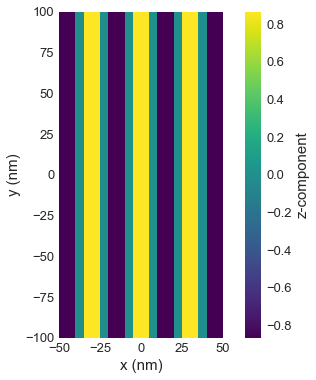

In [51]:
m.plane('z').mpl.plot()

In [52]:
saxs = mag2exp.x_ray.saxs(m)

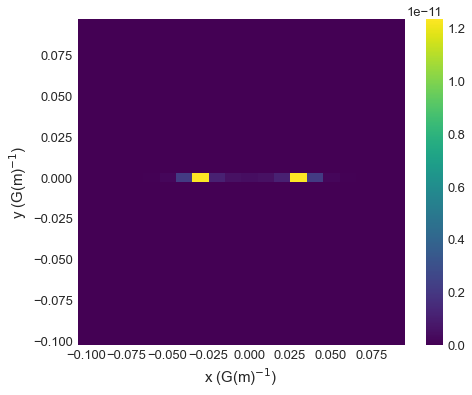

In [53]:
saxs.mpl.scalar()

In [62]:
saxs.mesh.cell

(10000000.0, 5000000.0, 19999999999.99982)

In [59]:
def an_fun(pos):
    x, y, z = pos
    qx = 30e-9
    if (x <= 1/qx + 0.5e8) and (x >= 1/qx - 0.5e8):
        analytical = np.pi*30e-9*Ms
        return abs(analytical)**2
    return 0
an_sans = df.Field(saxs.mesh, dim=1, value=an_fun)

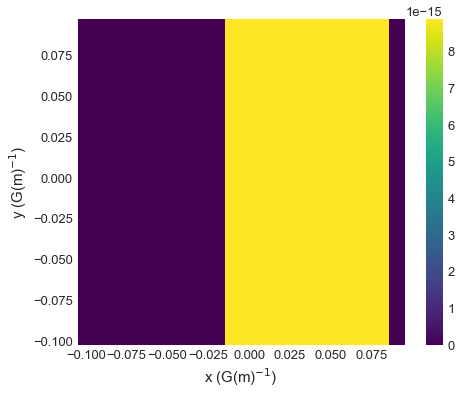

In [60]:
an_sans.plane('z').mpl.scalar()

In [65]:
(np.pi*30e-9*Ms*2)**2

3.5530575843921685e-14

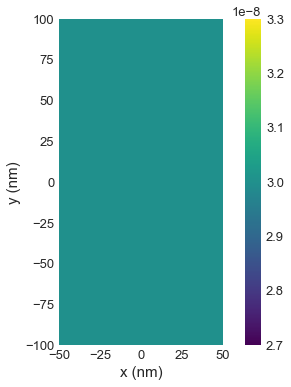

In [29]:
region = df.Region(p1=(-50e-9, -100e-9, 0), p2=(50e-9, 100e-9, 30e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

def m_fun(pos):
    x, y, z = pos
    qx = 30e-9
    qz = 20e-9
    return [0, 0, 1]
m = df.Field(mesh, dim=3, value=m_fun, norm=1)

holo = mag2exp.x_ray.holography(m)
holo.mpl.plot()